In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("D:/CARRERA/TESIS/forest_explainer_tesis/datasets/Titanic/DataSet_Titanic.csv")

In [3]:
import joblib
from sklearn.ensemble import RandomForestClassifier

random_forest_model: RandomForestClassifier = joblib.load(
    "D:/CARRERA/TESIS/forest_explainer_tesis/datasets/Titanic/titanic.joblib")

In [4]:
for index, tree in enumerate(random_forest_model.estimators_):
    print(tree.feature_names_in_)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_names_in_'

In [87]:
from sklearn.model_selection import train_test_split

data = df.drop(columns="Sobreviviente")
x_train, x_test, y_train, y_test = train_test_split(
    data, df["Sobreviviente"], test_size=0.2, random_state=123
)

In [91]:
int(len(data)/2)

357

In [5]:
q_variables_values_list = [
    {
        "column_name": "Genero",
        "variables": [
            {
                "old_value": 0,
                "new_value": "Masculino"
            },
            {
                "old_value": 1,
                "new_value": "Femenino"
            },
        ]
    },
    {
        "column_name": "Clase",
        "variables": [
            {
                "old_value": 1,
                "new_value": "Primera Clase"
            },
            {
                "old_value": 2,
                "new_value": "Segunda Clase"
            },
            {
                "old_value": 3,
                "new_value": "Tercera Clase"
            },
        ]
    }
]

target_description = [
    {
        "column_name": "Sobreviviente",
        "variables": [
            {
                "old_value": 0,
                "new_value": "Muere"
            },
            {
                "old_value": 1,
                "new_value": "Vive"
            },
        ]
    }
]

In [8]:
from sklearn.tree import _tree

DT = {
    # "model": tree.DecisionTreeClassifier(max_depth=2).fit(x_train, y_train),
    "model": random_forest_model.estimators_[10],
    "features": data.columns,
    "class_names": ["Muere", "Vive"],
    "target": "Sobreviviente",
    "q_variables": ["Genero", "Clase"],
    "q_variables_values": q_variables_values_list,
}

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
X = iris.data # we only take the first two features.
y = iris.target

print(iris.target_names)

# Train a decision tree classifier

clf = DecisionTreeClassifier(random_state=0)

clf = clf.fit(X, y)

['setosa' 'versicolor' 'virginica']


In [40]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
from model.explainers.decision_tree_surrogate import ExplainSingleTree

surrogateTree = ExplainSingleTree.createSurrogateTree(
    x_train=data, max_depth=8,model=random_forest_model
)

rules = ExplainSingleTree.get_rules(
    model=surrogateTree.tree_,
    q_variables=["Genero", "Clase"],
    q_variables_values=q_variables_values_list,
    features=surrogateTree.feature_names_in_,
    class_names=["muere", "vive"],
    target="Sobrviviente",
)

Tree
1.0
[1. 0.]
1.0
Tree
1.0
[0. 1.]
1.0
Tree
1.0
[1. 0.]
1.0
Tree
1.0
[1. 0.]
1.0
Tree
1.0
[1. 0.]
1.0
Tree
1.0
[0. 1.]
1.0
Tree
1.0
[0. 1.]
1.0


In [7]:
for rule in rules:
    print(rule["probability"])

100.0
100.0
94.44
100.0
100.0
100.0


FUNCTION FOR GETTING RULES

In [74]:

def get_rules(model, q_variables, q_variables_values, features, class_names, target):
    tree_ = model
    feature_name = [
        features[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def get_simplified_route(route):
        simplified_route = list(route)
        watched_classes_plus = []
        watched_classes_less = []
        done = False
        iteration = 0
        while (not done):
            analyzed_rule = {}
            analyzed_item = ""
            analyzed_sign = ""
            analyzed_value = []
            analyzed_type = ""
            for i in range(len(route)):
                if (iteration + i) < len(route):
                    actual = route[i + iteration]
                    if actual["item"] not in q_variables and (analyzed_type == "number" or not analyzed_type):
                        if not analyzed_item:
                            analyzed_rule = actual
                            analyzed_type = "number"
                            analyzed_item = actual["item"]
                            analyzed_value = actual["value"]
                            if analyzed_item not in watched_classes_plus and actual["sign"] == " > ":
                                watched_classes_plus.append(analyzed_item)
                                analyzed_sign = " > "
                            elif analyzed_item not in watched_classes_less and actual["sign"] == " <= ":
                                watched_classes_less.append(analyzed_item)
                                analyzed_sign = " <= "
                        elif actual["item"] == analyzed_item and actual["sign"] == analyzed_sign:
                            try:
                                if analyzed_sign == " > ":
                                    if actual["value"] > analyzed_value:
                                        simplified_route.remove(analyzed_rule)
                                        analyzed_value = actual["value"]
                                        analyzed_rule = actual
                                    elif actual["value"] <= analyzed_value:
                                        simplified_route.remove(actual)
                                elif analyzed_sign == " <= ":
                                    if actual["value"] <= analyzed_value:
                                        simplified_route.remove(analyzed_rule)
                                        analyzed_value = actual["value"]
                                        analyzed_rule = actual
                                    elif actual["value"] > analyzed_value:
                                        simplified_route.remove(actual)
                            except Exception as e:
                                str(e)
                                break
                    elif analyzed_type == "object" or not analyzed_type:
                        if not analyzed_item:
                            analyzed_rule = actual
                            analyzed_type = "object"
                            analyzed_sign = "es :"
                            analyzed_item = actual["item"]
                            analyzed_value = actual["value"]
                        elif actual["item"] == analyzed_item:
                            try:
                                if all(val in analyzed_value for val in actual["value"]):
                                    simplified_route.remove(analyzed_rule)
                                    analyzed_value = actual["value"]
                                elif all(analyzed_val in actual["value"] for analyzed_val in analyzed_value):
                                    simplified_route.remove(actual)
                            except Exception as e:
                                str(e)
                                break
                else:
                    break
            iteration += 1
            if iteration >= len(route):
                done = True
        return simplified_route

    def get_rule(name, threshold, bigger):
        rule = [{
            "item": name,
            "sign": "",
            "value": []
        }]
        if name in q_variables:
            new_args = []
            # condition = "es : "
            rule[0]["sign"] = "es: "
            for variables in q_variables_values:
                if variables["column_name"] == name:
                    for values in variables["variables"]:
                        if (not bigger and values["old_value"] <= threshold) or (
                                bigger and values["old_value"] > threshold):
                            new_args.append(values["new_value"])
            rule[0]["value"] = new_args
        else:
            if not bigger:
                rule[0]["sign"] = " <= "
            else:
                rule[0]["sign"] = " > "
            rule[0]["value"] = [f"{np.round(threshold, 3)}"]

        return rule

    def get_text_route(route):
        text_route = []
        for val in route:
            if val["item"] not in q_variables:
                text_route += [(f"({val['item']} {val['sign']} {val['value'][0]})")]
            else:
                values = ""
                first = True

                for i in range(len(val['value'])):
                    if first:
                        values += f"{val['value'][i]}"
                        first = False
                    else:
                        values += f" o {val['value'][i]}"
                text_route += [(f"{val['item']} {val['sign']} {values}")]
        return text_route

    pathx = {}
    iterator = 0
    def recurse(node, route, routes, pathx, iterator):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:            
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_path_rules, right_path_rules = list(route), list(route)
            left_path_rules += get_rule(name, threshold, bigger=False)
            try:
                pathx[f"left{iterator}"] += f" {iterator} "
            except:
                pathx[f"left{iterator}"] = f"{iterator} "
            print("pathx: ", pathx)
            print("iterator: ", iterator)
            recurse(tree_.children_left[node], left_path_rules, routes, pathx, iterator)
            iterator+=1
            right_path_rules += get_rule(name, threshold, bigger=True)    
            recurse(tree_.children_right[node], right_path_rules, routes, pathx, iterator)
        else:
            simplified_route = get_simplified_route(route)
            simplified_route += [(tree_.value[node], tree_.n_node_samples[node])]
            routes += [simplified_route]

    recurse(0, path, paths, pathx, iterator)
    
    print("pathx: ", pathx)
    print("iterator: ", iterator)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        # rule = "Si "
        rule = {}
        rule["causes"] = path[:-1]
        classes = path[-1][0][0]
        position = np.argmax(classes)
        rule["target_value"] = class_names[position]
        rule["probability"] = np.round(100.0 * classes[position] / np.sum(classes), 2)
        rule["samples_amount"] = path[-1][1]
        rules.append(rule)

    return rules

In [75]:
rules = get_rules(model=surrogateTree.tree_, q_variables=DT["q_variables"], q_variables_values=DT["q_variables_values"], features=DT["features"], class_names=DT["class_names"], target=DT["target"])
# print()
# print()
# for r in rules:
#     print(r)
# print()

pathx:  {'left0': '0 '}
iterator:  0
pathx:  {'left0': '0  0 '}
iterator:  0
pathx:  {'left0': '0  0  0 '}
iterator:  0
pathx:  {'left0': '0  0  0 ', 'left1': '1 '}
iterator:  1
pathx:  {'left0': '0  0  0 ', 'left1': '1  1 '}
iterator:  1
pathx:  {'left0': '0  0  0 ', 'left1': '1  1  1 '}
iterator:  1
pathx:  {'left0': '0  0  0 ', 'left1': '1  1  1 '}
iterator:  0


In [39]:
import matplotlib

matplotlib.use('TkAgg')  # or 'Agg', 'Qt5Agg', etc.

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree


# assuming clf is your DecisionTreeClassifier instance

fig, ax = plt.subplots(figsize=(12, 8))

plot_tree(surrogateTree, 
          feature_names=random_forest_model.feature_names_in_, 
          class_names=["muere", "vive"], 
          filled=True, 
          ax=ax)

plt.show()

In [58]:
from matplotlib.text import Annotation
from sklearn.datasets import load_iris

from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)

iris = load_iris()

clf = clf.fit(iris.data, iris.target)

an = tree.plot_tree(clf)

for a in an:
    annot: Annotation = a
    print()
    print(list(annot))

TypeError: 'Annotation' object is not iterable

In [41]:
plt.show()

In [43]:
text_representation = tree.export_text(clf)
text_representation

'|--- feature_3 <= 0.80\n|   |--- class: 0\n|--- feature_3 >  0.80\n|   |--- feature_3 <= 1.75\n|   |   |--- feature_2 <= 4.95\n|   |   |   |--- feature_3 <= 1.65\n|   |   |   |   |--- class: 1\n|   |   |   |--- feature_3 >  1.65\n|   |   |   |   |--- class: 2\n|   |   |--- feature_2 >  4.95\n|   |   |   |--- feature_3 <= 1.55\n|   |   |   |   |--- class: 2\n|   |   |   |--- feature_3 >  1.55\n|   |   |   |   |--- feature_2 <= 5.45\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_2 >  5.45\n|   |   |   |   |   |--- class: 2\n|   |--- feature_3 >  1.75\n|   |   |--- feature_2 <= 4.85\n|   |   |   |--- feature_1 <= 3.10\n|   |   |   |   |--- class: 2\n|   |   |   |--- feature_1 >  3.10\n|   |   |   |   |--- class: 1\n|   |   |--- feature_2 >  4.85\n|   |   |   |--- class: 2\n'

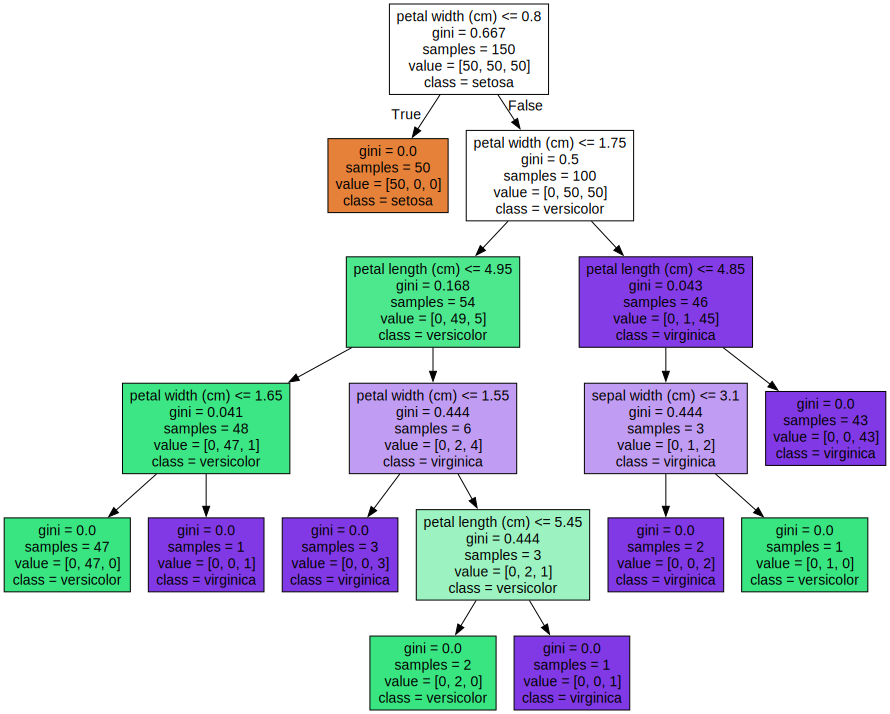

In [44]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [48]:
def extract_edges(clf):
    edges = []
    for i, (x, y) in enumerate(
        zip(clf.tree_.children_left, clf.tree_.children_right)
    ):

        if x != -1:
            edges.append((i, x))
        if y != -1:
            edges.append((i, y))

    return edges

In [49]:
import plotly.graph_objects as go
import numpy as np



E = [(0,1), (1,2), (1,3), (2,4), (4,5), (4,6), (7,8), (7,9), (9,10), (9,11),
     (0,12), (12, 13), (13,7), (12,14), (14,15), (14, 16)]
labels= np.arange(17)
Xnodes, Ynodes, Xedges, Yedges = get_plotly_data(E, coords)
nodes= get_node_trace(Xnodes, Ynodes, labels, marker_size=18, marker_color='#c0c0c0')
edges= get_edge_trace(Xedges, Yedges)
fig= go.Figure([edges, nodes])
fig.update_layout(title_text="Decision tree",
            title_x=0.5,
            font_size=12,
            showlegend=False,
            width=800,
            height=600,
            xaxis_visible=False,
            yaxis_visible=False, 
            template='none',     
            hovermode='closest',
            paper_bgcolor='#eeeeee')
fig.show()

[(0, 1),
 (0, 10),
 (1, 2),
 (1, 5),
 (2, 3),
 (2, 4),
 (5, 6),
 (5, 9),
 (6, 7),
 (6, 8),
 (10, 11),
 (10, 12)]

In [77]:
import dash

import dash_core_components as dcc

import dash_html_components as html

from dash.dependencies import Input, Output

import plotly.express as px

import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split


# Load iris dataset

iris = load_iris()

X = iris.data

y = iris.target


# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create decision tree classifier

clf = DecisionTreeClassifier(random_state=42)

clf = clf.fit(X_train, y_train)


# Create plotly figure of decision tree



In [85]:
clf.tree_.value_stride

AttributeError: 'sklearn.tree._tree.Tree' object has no attribute 'value_stride'

In [86]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2